<a href="https://colab.research.google.com/github/Kavindu-20241240/mlcw/blob/main/mlcw_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [99]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where TotalCharges is missing
df = df.dropna(subset=["TotalCharges"])

# Remove customerID (not useful), checking if it exists first
if 'customerID' in df.columns:
    df = df.drop("customerID", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [100]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nSummary statistics:\n", df.describe())


Dataset shape: (7032, 20)

Missing values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary statistics:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000

/tmp/ipython-input-2684566131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


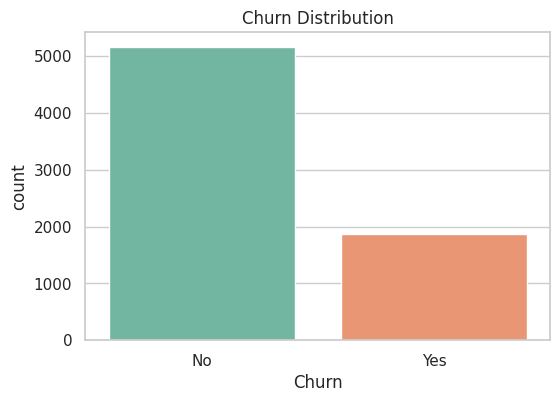

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.show()


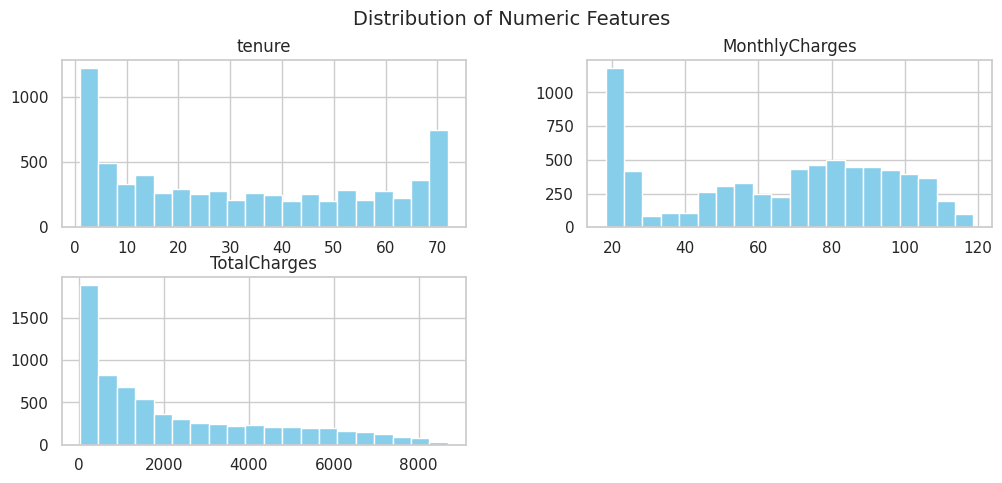

In [102]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[numeric_cols].hist(bins=20, figsize=(12,5), color="skyblue")
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.show()


/tmp/ipython-input-3983318743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")
/tmp/ipython-input-3983318743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")
/tmp/ipython-input-3983318743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="Set3")


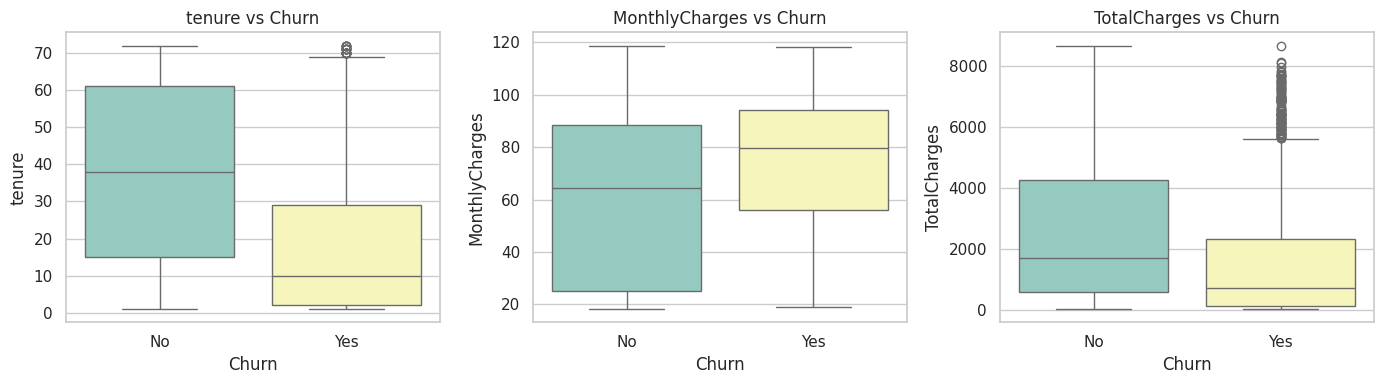

In [103]:
plt.figure(figsize=(14,4))

for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df, x="Churn", y=col, palette="Set3")
    plt.title(f"{col} vs Churn")

plt.tight_layout()
plt.show()


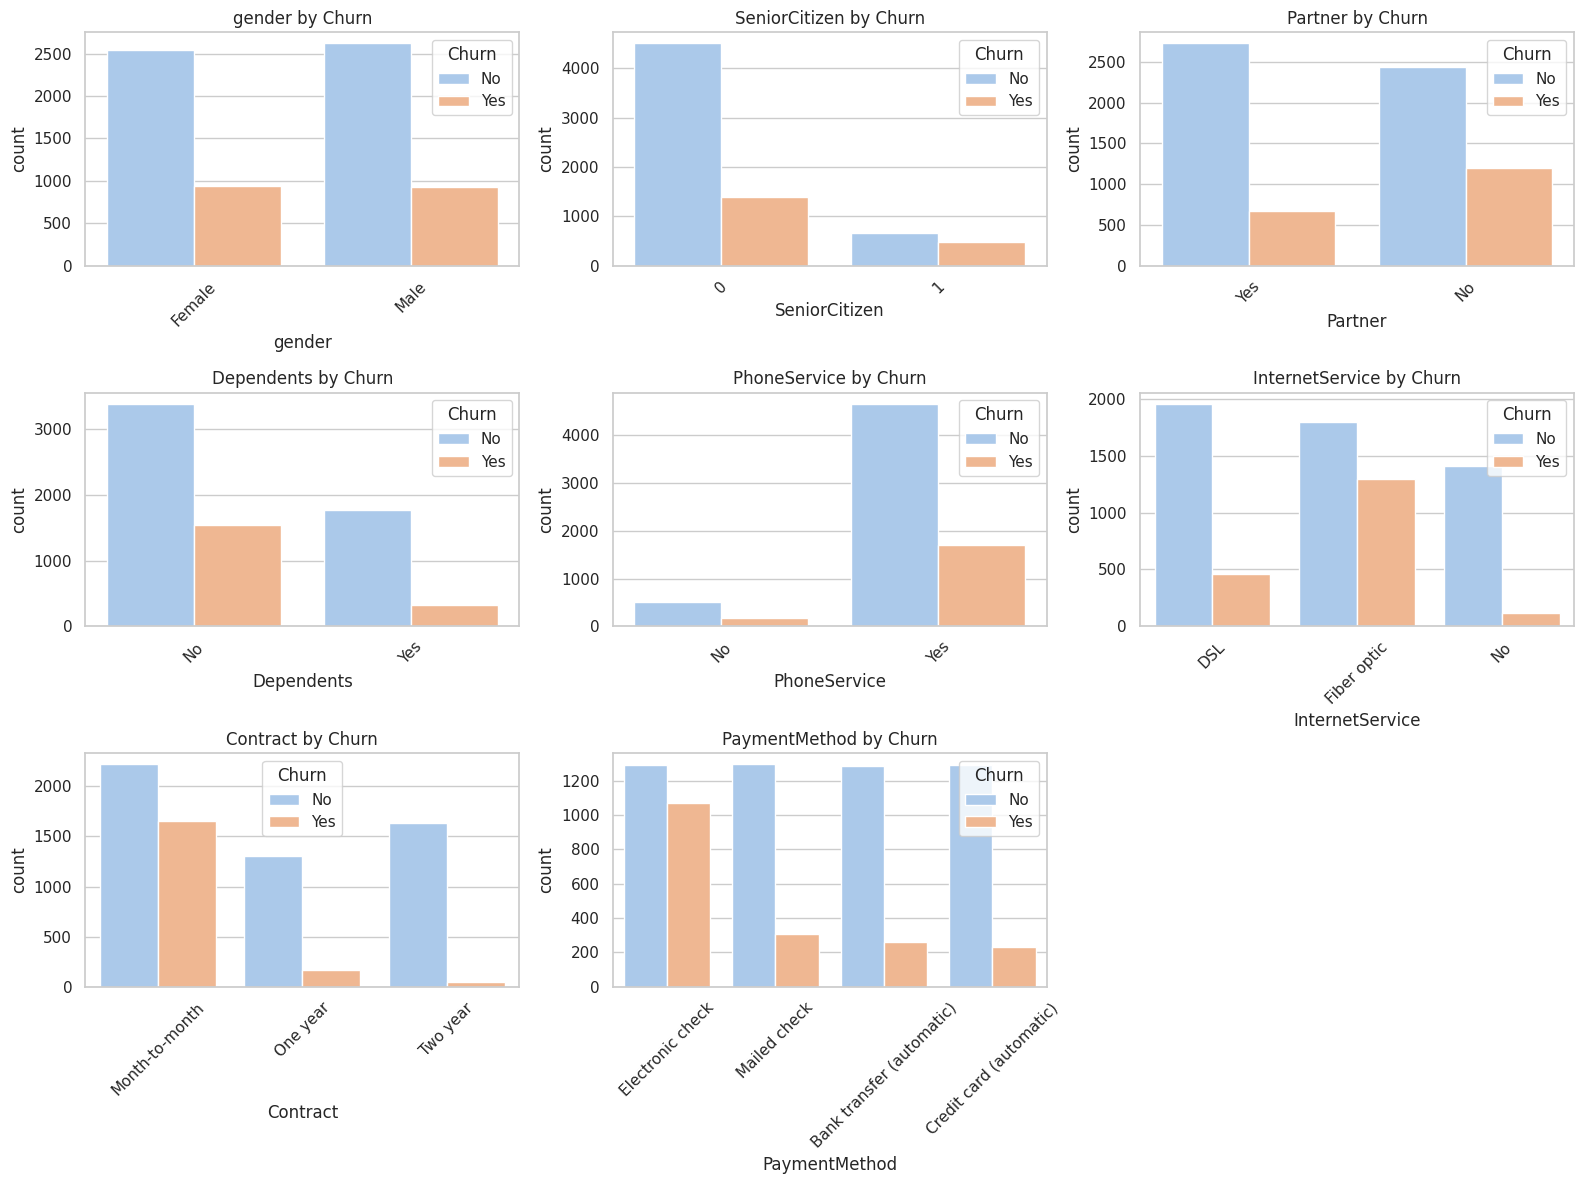

In [104]:
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "InternetService", "Contract",
    "PaymentMethod"
]

plt.figure(figsize=(16,12))

for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, hue="Churn", palette="pastel")
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


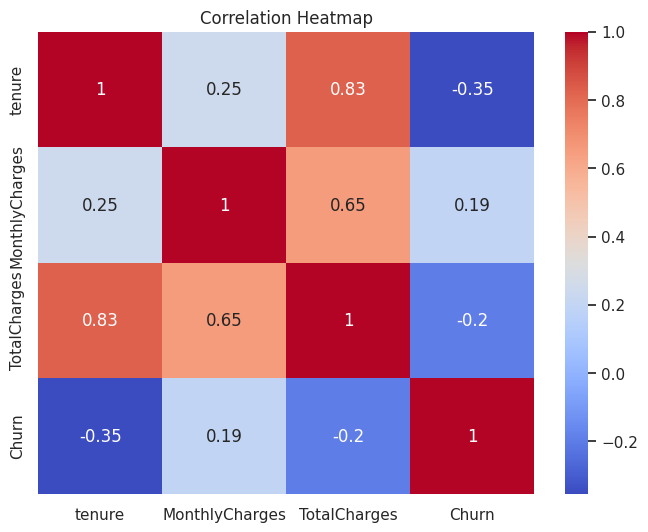

In [105]:
# Convert churn to numeric for correlation
df_corr = df.copy()
df_corr["Churn"] = df_corr["Churn"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(8,6))
corr = df_corr[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


PreProccesing

In [106]:
# Encode all categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [107]:
X = df_encoded.drop("Churn_Yes", axis=1)  # Features
y = df_encoded["Churn_Yes"]              # Target (0 = No, 1 = Yes)


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

Train

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [110]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights for imbalanced churn data
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1]),
    y=y_train
)

class_weight_dict = {
    0: class_weights[0],
    1: class_weights[1]
}

print("Class weights:", class_weight_dict)


Class weights: {0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}


Descition Tree


In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [112]:
dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=20,
    criterion="gini",
    random_state=42
)


In [113]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)

In [114]:
dt_pred = dt.predict(X_test)


In [115]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.7853589196872779
[[907 126]
 [176 198]]
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1033
        True       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [116]:
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


[[907 126]
 [176 198]]
              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1033
        True       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Neural Network

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [118]:
nn = Sequential()

nn.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dropout(0.3))

nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [120]:
history = nn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=32,
    class_weight=class_weight_dict,
    verbose=1
)



Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6789 - loss: 0.6195 - val_accuracy: 0.7644 - val_loss: 0.4928
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7565 - loss: 0.5213 - val_accuracy: 0.7760 - val_loss: 0.4765
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7452 - loss: 0.5128 - val_accuracy: 0.7662 - val_loss: 0.4982
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7459 - loss: 0.5003 - val_accuracy: 0.7680 - val_loss: 0.4938
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7378 - loss: 0.5034 - val_accuracy: 0.7618 - val_loss: 0.4916
Epoch 6/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7561 - loss: 0.4785 - val_accuracy: 0.7716 - val_loss: 0.4756
Epoch 7/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7482 - loss: 0.4883 - val_accuracy: 0.7724 - val_loss: 0.4781
Epoch 8/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7514 - loss: 0.4931 - val_accurac

In [121]:
nn_pred = (nn.predict(X_test) > 0.5).astype(int)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("\nClassification Report:\n", classification_report(y_test, nn_pred))

Neural Network Accuracy: 0.7484008528784648

Confusion Matrix:
 [[764 269]
 [ 85 289]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.74      0.81      1033
        True       0.52      0.77      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



Comparison graphs

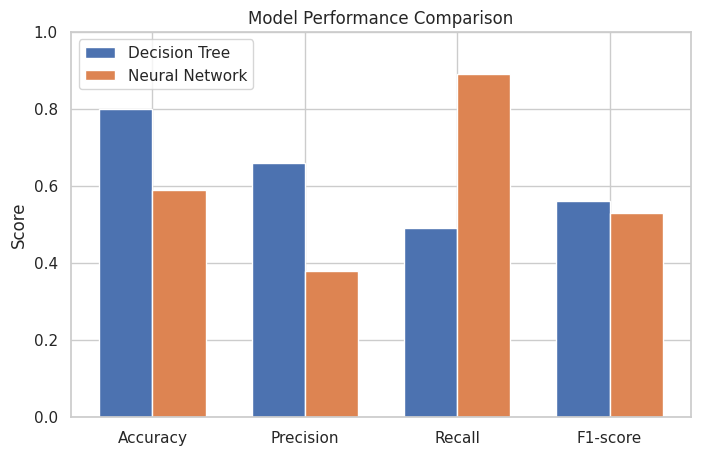

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for churn class (True)
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

decision_tree_scores = [0.80, 0.66, 0.49, 0.56]
neural_network_scores = [0.59, 0.38, 0.89, 0.53]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, decision_tree_scores, width, label="Decision Tree")
plt.bar(x + width/2, neural_network_scores, width, label="Neural Network")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()


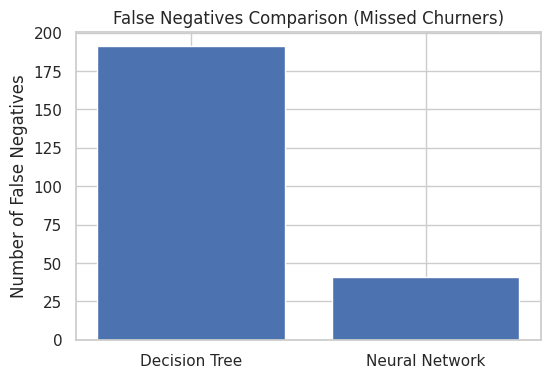

In [124]:
models = ["Decision Tree", "Neural Network"]
false_negatives = [191, 41]

plt.figure(figsize=(6,4))
plt.bar(models, false_negatives)
plt.ylabel("Number of False Negatives")
plt.title("False Negatives Comparison (Missed Churners)")
plt.show()


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


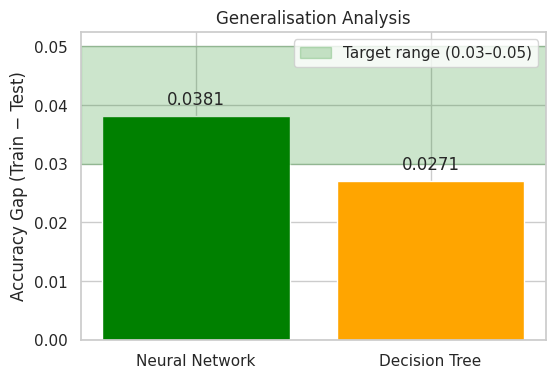

In [125]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train accuracy
dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
nn_train_acc = accuracy_score(
    y_train,
    (nn.predict(X_train) > 0.5).astype(int)
)

# Test accuracy
dt_test_acc = accuracy_score(y_test, dt_pred)
nn_test_acc = accuracy_score(y_test, nn_pred)

# Accuracy gaps
nn_gap = abs(nn_train_acc - nn_test_acc)
dt_gap = abs(dt_train_acc - dt_test_acc)

gaps = [nn_gap, dt_gap]
models = ["Neural Network", "Decision Tree"]

plt.figure(figsize=(6,4))
plt.bar(models, gaps, color=["green", "orange"])

# Target acceptable range
plt.axhspan(0.03, 0.05, color="green", alpha=0.2, label="Target range (0.03–0.05)")

for i, v in enumerate(gaps):
    plt.text(i, v + 0.002, f"{v:.4f}", ha="center")

plt.ylabel("Accuracy Gap (Train − Test)")
plt.title("Generalisation Analysis")
plt.legend()
plt.show()



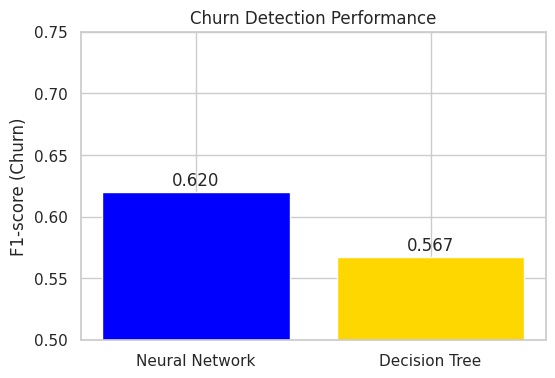

In [126]:
from sklearn.metrics import f1_score

dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

f1_scores = [nn_f1, dt_f1]

plt.figure(figsize=(6,4))
plt.bar(models, f1_scores, color=["blue", "gold"])

for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center")

plt.ylabel("F1-score (Churn)")
plt.title("Churn Detection Performance")
plt.ylim(0.5, 0.75)
plt.show()


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


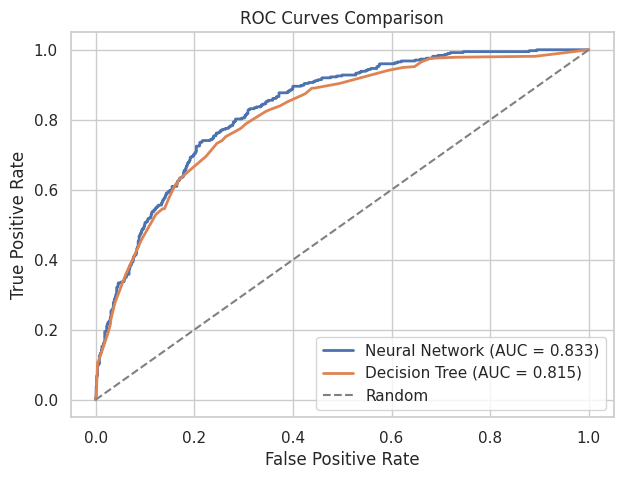

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is 1D numpy array
y_test_np = np.array(y_test).ravel()

# Probabilities
dt_probs = dt.predict_proba(X_test)[:, 1]
nn_probs = nn.predict(X_test).ravel()

# ROC curve points
dt_fpr, dt_tpr, _ = roc_curve(y_test_np, dt_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test_np, nn_probs)

# AUC
dt_auc = auc(dt_fpr, dt_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot
plt.figure(figsize=(7,5))
plt.plot(nn_fpr, nn_tpr, label=f"Neural Network (AUC = {nn_auc:.3f})", linewidth=2)
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})", linewidth=2)
plt.plot([0,1], [0,1], linestyle="--", color="grey", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


Condfusion Matrix


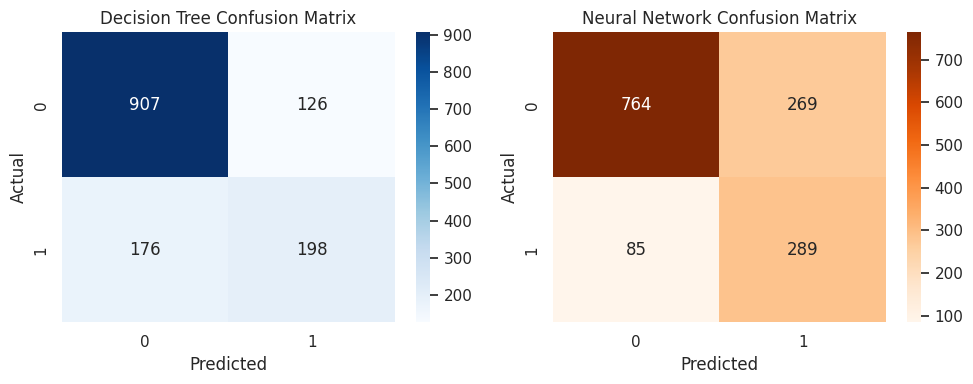

In [128]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(nn_cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [129]:
threshold = 0.25
nn_pred = (nn_probs > threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("Threshold:", threshold)
print(confusion_matrix(y_test, nn_pred))
print(classification_report(y_test, nn_pred))



Threshold: 0.25
[[531 502]
 [ 29 345]]
              precision    recall  f1-score   support

       False       0.95      0.51      0.67      1033
        True       0.41      0.92      0.57       374

    accuracy                           0.62      1407
   macro avg       0.68      0.72      0.62      1407
weighted avg       0.80      0.62      0.64      1407

